In [2]:
#import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [3]:
#define the path of the file
file_path = r"/content/Prediction_analysis.xlsx"

#define the sheet name to read data from
sheet_name = 'vm_ChurnData'

#read the data from the specific sheet into a data frame
data =  pd.read_excel (file_path, sheet_name = sheet_name)

#display the first few rows of the feteched data
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

In [4]:
#data processing
#drop columns which are not necessary for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

#list of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Fit and store encoders
label_encoders = {}
for column in columns_to_encode:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

#display the first few rows of the processed data
print(data.head())

   Gender  Age  Married  State  Number_of_Referrals  Tenure_in_Months  \
0       0   30        1     11                    0                31   
1       1   51        0     15                    5                 9   
2       0   43        1     21                    3                28   
3       1   35        0     12                   10                12   
4       1   75        1     17                   12                27   

   Value_Deal  Phone_Service  Multiple_Lines  Internet_Service  ...  Contract  \
0           0              1               0                 1  ...         2   
1           4              1               0                 1  ...         0   
2           0              1               1                 1  ...         2   
3           5              1               0                 1  ...         2   
4           1              1               0                 1  ...         2   

   Paperless_Billing  Payment_Method  Monthly_Charge  Total_Charges  \
0  

In [5]:
#manually encode the target value 'customer_status'
data['Customer_Status'] = data['Customer_Status'].map({'Churned': 1, 'Stayed': 0})

#display the first few rows of the processed data
print(data.head())

   Gender  Age  Married  State  Number_of_Referrals  Tenure_in_Months  \
0       0   30        1     11                    0                31   
1       1   51        0     15                    5                 9   
2       0   43        1     21                    3                28   
3       1   35        0     12                   10                12   
4       1   75        1     17                   12                27   

   Value_Deal  Phone_Service  Multiple_Lines  Internet_Service  ...  Contract  \
0           0              1               0                 1  ...         2   
1           4              1               0                 1  ...         0   
2           0              1               1                 1  ...         2   
3           5              1               0                 1  ...         2   
4           1              1               0                 1  ...         2   

   Paperless_Billing  Payment_Method  Monthly_Charge  Total_Charges  \
0  

In [6]:
# split the data into feature and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# train the random forest model
# initialize the random forest classifire
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#fit the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
#evalute model
#make prediction
y_pred = rf_classifier.predict(X_test)

# Save model and encoders
joblib.dump(rf_classifier, "rf_churn_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

#display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("classification report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[781  53]
 [148 220]]
classification report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       834
           1       0.81      0.60      0.69       368

    accuracy                           0.83      1202
   macro avg       0.82      0.77      0.79      1202
weighted avg       0.83      0.83      0.82      1202



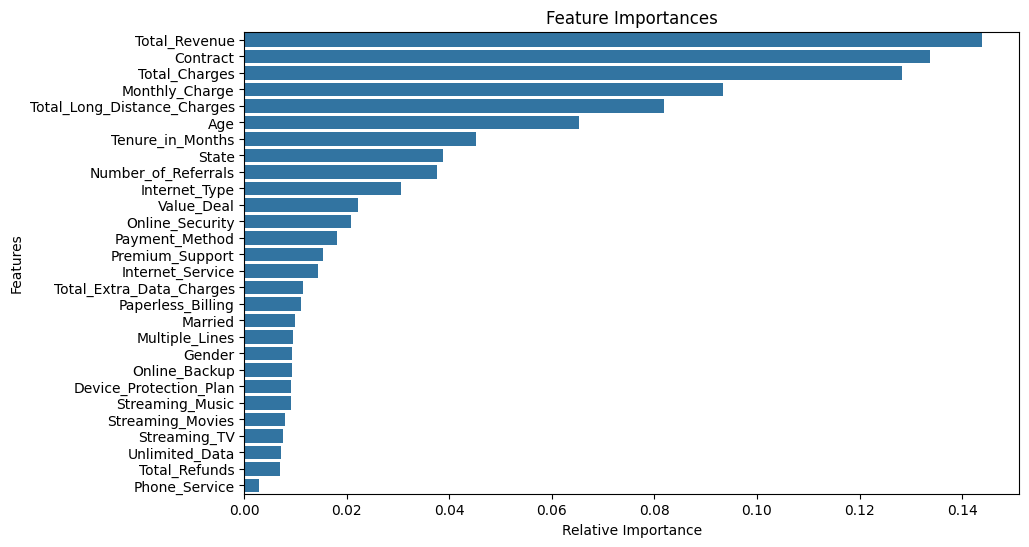

In [11]:
#feature importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

#plot the features importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()

In [13]:
#predict on new data
#define the path of the file
file_path = r"/content/Prediction_analysis.xlsx"

#define the sheet name to read data from
sheet_name = 'vm_JoinData'

#read the dataframe from the specific sheet into df
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

#print the heads
print(new_data.head())

#retain the original dataframe
original_data = new_data.copy()

# retain the customer id column
customer_ids = new_data['Customer_ID']

#drop columns which are not necessary for prediction
new_data = new_data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason', 'Customer_Status'], axis=1) # Drop 'Customer_Status'

# Apply saved encoders
for column in columns_to_encode:
    le = label_encoders[column]
    try:
        new_data[column] = le.transform(new_data[column])
    except ValueError:
        # Handle unseen labels by setting as most common class
        new_data[column] = new_data[column].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

#display the first few rows of the processed data
print(new_data.head())



  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   23605-MAH  Female   31     Yes    Maharashtra                    1   
1   23632-HAR  Female   37     Yes        Haryana                    2   
2   23683-TEL    Male   26      No      Telangana                   10   
3   23729-UTT  Female   58      No  Uttar Pradesh                   14   
4   26902-TEL    Male   52     Yes      Telangana                    7   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                19        NaN           Yes             No  ...   
1                16     Deal 5           Yes             No  ...   
2                16        NaN           Yes             No  ...   
3                19     Deal 5           Yes             No  ...   
4                 2        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      20.750000     20.750000           0.0   
1  Bank Withdraw

In [14]:

# Make predictions
new_predictions = rf_classifier.predict(new_data)

# Add results
original_data['Customer_Status_Predicted'] = new_predictions
churned_customers = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save result
output_path = "Predicted_Churn_Customers.csv"
churned_customers.to_csv(output_path, index=False)
print(f"Saved predictions to: {output_path}")

Saved predictions to: Predicted_Churn_Customers.csv
